# Análisis de Negocio Airbnb

Introducción:

Se realizará un aálisis del negocio Airbnb tomando como base la información disponible sobre:
1. Datos de ocupación, precio, etc
2. Detalle de cada operación de Listing: incluye datos descriptivos de la vivienda (ambientes, host, noches mínimas y máximas, cantidad de reviews)
3. Datos de review de los usuarios.
Con la finalidad de identificar las carácteristicas generales que permitan elaborar una(s) propesta(s) sobre oportunidad(es) de inversión en este modelo de negocio.

Objetivo:

Realizar una análisis exploratorio de tipo descriptivo para entender el negocio de airbnb y plantear oportunidades de inversión que puedan ser capitalizadas utilizando dicho modelo de negocio.
Publico Objetivo: Grupo Inversor

Preguntas de Negocio:

¿Cuáles son las características generales del Negocio airbnb?

¿Cuál es la mejor forma de invertir en AirBnb?

¿Cómo se compara con otras alternativas de inversión?

¿Qué propuestas se podrían hacer al grupo inversión? ¿ Dónde se podría invertir? ¿ En qué tipo de propiedad?


Desarrollo:

El proceso para llevar a cabo el análisis exploratorio y el planteniamiento de oportunidades de inversión será el siguiente:

1: Extracción de datos

2: Transformación y Limpieza de datos

3: Análisis Descriptivo

# Paso 1 y Paso 2: Extracción de  Datos y Transformación

In [2]:
# Lectura de los datos suministrados
import pandas as pd


In [3]:
#Se inicia con el archivo "calendario.csv" que contiene información sobre:
# la ocupación, disponibilidad, precio, precio ajustado y noches mínimas y máximas de reserva
calendario = pd.read_csv(r"C:\Users\SARAY\Documents\Cursos Cortos\Henry\Modulo 5\Proyecto Integrador\2 AirBnB\calendar.csv", delimiter= ",",
                         usecols=["listing_id","date","available","price","adjusted_price","minimum_nights","maximum_nights"])
calendario.head(10)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50778,2020-04-26,f,"$2,655.00","$2,655.00",5.0,1125.0
1,133654,2020-04-27,t,"$1,150.00","$1,150.00",4.0,1125.0
2,133654,2020-04-28,t,"$1,150.00","$1,150.00",4.0,1125.0
3,133654,2020-04-29,t,"$1,150.00","$1,150.00",4.0,1125.0
4,133654,2020-04-30,t,"$1,150.00","$1,150.00",4.0,1125.0
5,133654,2020-05-01,t,"$1,150.00","$1,150.00",4.0,1125.0
6,133654,2020-05-02,t,"$1,150.00","$1,150.00",4.0,1125.0
7,133654,2020-05-03,t,"$1,150.00","$1,150.00",4.0,1125.0
8,133654,2020-05-04,t,"$1,150.00","$1,150.00",4.0,1125.0
9,133654,2020-05-05,t,"$1,150.00","$1,150.00",4.0,1125.0


In [4]:
#Se procede a obtener la información general de las variables para pasar a los procesos de limpieza y transformación requeridos
calendario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661286 entries, 0 to 8661285
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 462.6+ MB


In [5]:
#Se ajustan los tipos de datos
calendario["date"]= pd.to_datetime(calendario["date"], format="%Y-%m-%d")
calendario["available"]= calendario["available"].astype("bool", errors="raise")
calendario["price"] = calendario["price"].str.replace("$","").str.replace(",","").astype("float")
calendario["adjusted_price"] = calendario["adjusted_price"].str.replace("$","").str.replace(",","").astype("float")
calendario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661286 entries, 0 to 8661285
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       bool          
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 404.7 MB


In [6]:
#Se obtiene la descripción general de las variables incluidas en calendario
pd.set_option('display.float_format', '{:.2f}'.format)
calendario.describe(include="all")

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
count,8661286.00,8661286,8661286,8661286.00,8661286.00,8661181.00,8661181.00
unique,NaN,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,True,NaN,NaN,NaN,NaN
freq,NaN,NaN,8661286,NaN,NaN,NaN,NaN
mean,26685456.90,2020-10-25 04:13:56.891520512,NaN,3938.84,3934.01,6.04,768.52
min,11508.00,2020-04-26 00:00:00,NaN,19.00,19.00,1.00,1.00
25%,17656805.00,2020-07-26 00:00:00,NaN,1350.00,1340.00,1.00,90.00
50%,30008780.00,2020-10-25 00:00:00,NaN,2000.00,1999.00,3.00,1125.00
75%,37362406.00,2021-01-24 00:00:00,NaN,3296.00,3253.00,4.00,1125.00
max,43286057.00,2021-04-26 00:00:00,NaN,6637914.00,6637914.00,1125.00,99999.00


In [7]:
#Se valida la existencia de datos nulos
calendario.isnull().sum()

listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    105
maximum_nights    105
dtype: int64

In [8]:
calendario.isna().sum()

listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    105
maximum_nights    105
dtype: int64

In [9]:
#Se eliminan todas las filas que sean duplicadas en el conjunto de datos
calendario.drop_duplicates(inplace= True, ignore_index= True)
calendario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661286 entries, 0 to 8661285
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       bool          
 3   price           float64       
 4   adjusted_price  float64       
 5   minimum_nights  float64       
 6   maximum_nights  float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 404.7 MB


In [1]:
#Se continua con el archivo listings que contine el Detalle de cada operación de Listing
import pandas as pd
listing = pd.read_csv(r"C:\Users\SARAY\Documents\Cursos Cortos\Henry\Modulo 5\Proyecto Integrador\2 AirBnB\listings.csv", delimiter=",")
listing.head(10)

C:\Users\SARAY\AppData\Local\Temp\ipykernel_7780\2583300835.py:3: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  listing = pd.read_csv(r"C:\Users\SARAY\Documents\Cursos Cortos\Henry\Modulo 5\Proyecto Integrador\2 AirBnB\listings.csv", delimiter=",")


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20200426042522,2020-04-26,Amazing Luxurious Apt-Palermo Soho,NaN,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,none,AREA: PALERMO SOHO Minutes walking distance fr...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.27
1,12463,https://www.airbnb.com/rooms/12463,20200426042522,2020-04-26,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,This is a very comfortable pull-out sofa in th...,My apartment is centrally located in Recoleta ...,none,It's near the school of medicine so the street...,...,f,f,moderate,f,f,1,0,1,0,0.16
2,13095,https://www.airbnb.com/rooms/13095,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Standard room : Palermo Viejo Bed & Breakfast ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,0.06
3,13096,https://www.airbnb.com/rooms/13096,20200426042522,2020-04-26,Standard Room in Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,NaN
4,13097,https://www.airbnb.com/rooms/13097,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,1.89
5,13099,https://www.airbnb.com/rooms/13099,20200426042522,2020-04-26,Lofty room in Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,NaN
6,13100,https://www.airbnb.com/rooms/13100,20200426042522,2020-04-26,Master Room in Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,...,f,f,strict_14_with_grace_period,f,f,7,0,7,0,0.03
7,14222,https://www.airbnb.com/rooms/14222,20200426042522,2020-04-26,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,ONE BIG BEDROOM One lovely bedroom with a bal...,Beautiful cozy apartment in excellent location...,none,Palermo is such a perfect place to explore the...,...,f,f,moderate,t,t,3,3,0,0,0.95
8,14711,https://www.airbnb.com/rooms/14711,20200426042522,2020-04-27,SPECTACULAR ANCIENT HOUSE,NaN,"I offer a big and ancient house in Villa Lia, ...","I offer a big and ancient house in Villa Lia, ...",none,NaN,...,f,f,flexible,f,f,1,1,0,0,NaN
9,15074,https://www.airbnb.com/rooms/15074,20200426042522,2020-04-27,ROOM WITH RIVER SIGHT,NaN,I OFFER A ROOM IN MY APARTMENT LOCATED IN OLIV...,I OFFER A ROOM IN MY APARTMENT LOCATED IN OLIV...,none,NaN,...,f,f,moderate,f,f,1,0,1,0,NaN


In [11]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23729 entries, 0 to 23728
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(21), object(62)
memory usage: 19.2+ MB


In [12]:
#Se identifican el total de columnas que tiene el archivo.
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [13]:
#Se procede a realizar una vista rápida por partes del archivo para validar el contenido de cada columna
#y seleccionar lascolumnas, que de acuerdo con los siguientes criterios nos suministren información
# requeridas para el análisis:
# 1.Variable suministra información sobre la propiedad: Nombre - Ubicación
# 2. Variable suministra información sobre las características de la propiedad: Tipo de Propiedad, estructura
# 3. Variable suministra Información sobre demanda de la propiedad: Reviews -
# 4. Variable suministra información sobre el host de la propiedad: Host- cantidad de propiedad 
# Se realizará la revisión en grupo de 20 columnas.
listing.iloc[:,0:20]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id
0,11508,https://www.airbnb.com/rooms/11508,20200426042522,2020-04-26,Amazing Luxurious Apt-Palermo Soho,NaN,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,LUXURIOUS NEW APT: 1 BDRM- POOL/ GYM/ SPA/ 24-...,none,AREA: PALERMO SOHO Minutes walking distance fr...,NaN,All major bus lines are nearby. Stop: Plaza It...,Outdoor pool and outdoor area on first floor F...,NaN,"During your stay in the apt, you must follow t...",NaN,NaN,https://a0.muscache.com/im/pictures/19357696/b...,NaN,42762
1,12463,https://www.airbnb.com/rooms/12463,20200426042522,2020-04-26,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,This is a very comfortable pull-out sofa in th...,My apartment is centrally located in Recoleta ...,none,It's near the school of medicine so the street...,NaN,Just a block from the Facultad de Medicina sub...,"Wi-Fi, kitchen, TV, Playstation 3",I work out of my apartment so I am around duri...,"Nothing formal, but no smoking and no guests w...",NaN,NaN,https://a0.muscache.com/im/pictures/11680256/5...,NaN,48799
2,13095,https://www.airbnb.com/rooms/13095,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Standard room : Palermo Viejo Bed & Breakfast ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/5397449/00...,NaN,50994
3,13096,https://www.airbnb.com/rooms/13096,20200426042522,2020-04-26,Standard Room in Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/5397459/87...,NaN,50994
4,13097,https://www.airbnb.com/rooms/13097,20200426042522,2020-04-26,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,Palermo Viejo Bed & Breakfast is located in a ...,Palermo Viejo B&B is a typical home in one of ...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/4970811/e8...,NaN,50994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23724,43278316,https://www.airbnb.com/rooms/43278316,20200426042522,2020-04-26,Huge House 6br patio and terrace,"Esta fantastica casa en Palermo, tiene 6 habit...",NaN,"Esta fantastica casa en Palermo, tiene 6 habit...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/056bf451-c...,NaN,1875949
23725,43280399,https://www.airbnb.com/rooms/43280399,20200426042522,2020-04-27,Patricios Park semi amueblado,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/b3cc22ad-2...,NaN,316810023
23726,43280552,https://www.airbnb.com/rooms/43280552,20200426042522,2020-04-26,Depto cañitas inigualable 4 pax,2 Dor Amob y Equip Divino Bcn en Corazón de La...,NaN,2 Dor Amob y Equip Divino Bcn en Corazón de La...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/9581acd2-0...,NaN,344453532
23727,43281112,https://www.airbnb.com/rooms/43281112,20200426042522,2020-04-27,Excelente departamento Palermo new age,"Excelente departamento de 3 ambientes, ubicado...",NaN,"Excelente departamento de 3 ambientes, ubicado...",none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/48d59b71-f...,NaN,344590039


In [14]:
listing.iloc[:,20:30]

,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url
0,https://www.airbnb.com/users/show/42762,Candela,2009-10-01,"New York, New York, United States",-,within a few hours,100%,100%,t,https://a0.muscache.com/im/users/42762/profile...
1,https://www.airbnb.com/users/show/48799,Matt,2009-10-28,"Danbury, Connecticut, United States",I'm an expatriate from the USA who has been li...,within a few hours,100%,NaN,f,https://a0.muscache.com/im/pictures/user/2e5c6...
2,https://www.airbnb.com/users/show/50994,Ariel,2009-11-03,"Buenos Aires, Capital Federal, Argentina","Viajero del mundo, actor, diseñador, amante de...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/50994/profile...
3,https://www.airbnb.com/users/show/50994,Ariel,2009-11-03,"Buenos Aires, Capital Federal, Argentina","Viajero del mundo, actor, diseñador, amante de...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/50994/profile...
4,https://www.airbnb.com/users/show/50994,Ariel,2009-11-03,"Buenos Aires, Capital Federal, Argentina","Viajero del mundo, actor, diseñador, amante de...",within an hour,100%,100%,f,https://a0.muscache.com/im/users/50994/profile...
...,...,...,...,...,...,...,...,...,...,...
23724,https://www.airbnb.com/users/show/1875949,Diego,2012-03-07,"Buenos Aires, Buenos Aires, Argentina",Hello! My name is Diego and I was born in the ...,within an hour,98%,96%,t,https://a0.muscache.com/im/users/1875949/profi...
23725,https://www.airbnb.com/users/show/316810023,Luis,2019-12-12,AR,NaN,within a few hours,100%,60%,f,https://a0.muscache.com/im/pictures/user/d15f1...
23726,https://www.airbnb.com/users/show/344453532,Agustin,2020-04-22,AR,NaN,NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/5f3c2...
23727,https://www.airbnb.com/users/show/344590039,Nicolas,2020-04-25,AR,NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/5b6f7...


In [15]:
listing.iloc[:,30:40]

,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed
0,https://a0.muscache.com/im/users/42762/profile...,Palermo,1.00,1.00,"['email', 'phone', 'reviews', 'kba']",t,t,"Buenos Aires, Capital Federal, Argentina",Palermo,Palermo
1,https://a0.muscache.com/im/pictures/user/2e5c6...,Recoleta,1.00,1.00,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Buenos Aires, Capital Federal, Argentina",Recoleta,Recoleta
2,https://a0.muscache.com/im/users/50994/profile...,Palermo,7.00,7.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Buenos Aires, Capital Federal, Argentina",Palermo,Palermo
3,https://a0.muscache.com/im/users/50994/profile...,Palermo,7.00,7.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Buenos Aires, Capital Federal, Argentina",Palermo,Palermo
4,https://a0.muscache.com/im/users/50994/profile...,Palermo,7.00,7.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Buenos Aires, Capital Federal, Argentina",Palermo,Palermo
...,...,...,...,...,...,...,...,...,...,...
23724,https://a0.muscache.com/im/users/1875949/profi...,Recoleta,64.00,64.00,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"AAT, Buenos Aires, Argentina",Almagro,Almagro
23725,https://a0.muscache.com/im/pictures/user/d15f1...,Parque Patricios,0.00,0.00,"['email', 'phone']",t,f,"Parque Patricios, Buenos Aires, Argentina",Parque Patricios,Parque Patricios
23726,https://a0.muscache.com/im/pictures/user/5f3c2...,NaN,0.00,0.00,"['phone', 'offline_government_id', 'selfie', '...",t,f,"Palermo, Buenos Aires, Argentina",Palermo,Palermo
23727,https://a0.muscache.com/im/pictures/user/5b6f7...,NaN,0.00,0.00,"['email', 'phone', 'offline_government_id', 's...",t,f,"Palermo, Buenos Aires, Argentina",Palermo,Palermo


In [16]:
listing.iloc[:,40:60]

,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet
0,NaN,Buenos Aires,Capital Federal,NaN,Buenos Aires,"Buenos Aires, Argentina",AR,Argentina,-34.58,-58.42,t,Condominium,Entire home/apt,2,1.00,1.00,1.00,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN
1,NaN,Buenos Aires,Capital Federal,NaN,Buenos Aires,"Buenos Aires, Argentina",AR,Argentina,-34.60,-58.39,t,Apartment,Private room,1,1.00,1.00,1.00,Pull-out Sofa,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",750.00
2,NaN,Buenos Aires,Capital Federal,1414,Buenos Aires,"Buenos Aires, Argentina",AR,Argentina,-34.59,-58.43,t,Bed and breakfast,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN
3,NaN,Buenos Aires,Capital Federal,1414,Buenos Aires,"Buenos Aires, Argentina",AR,Argentina,-34.59,-58.43,t,Bed and breakfast,Private room,2,1.00,1.00,2.00,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN
4,NaN,Buenos Aires,Capital Federal,1414,Buenos Aires,"Buenos Aires, Argentina",AR,Argentina,-34.59,-58.43,t,Bed and breakfast,Private room,2,1.00,1.00,2.00,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23724,NaN,AAT,Buenos Aires,C1180,Buenos Aires,"AAT, Argentina",AR,Argentina,-34.60,-58.42,t,House,Entire home/apt,12,4.50,6.00,8.00,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",NaN
23725,NaN,Parque Patricios,Buenos Aires,C1256,Buenos Aires,"Parque Patricios, Argentina",AR,Argentina,-34.63,-58.41,t,Apartment,Entire home/apt,2,1.50,1.00,2.00,Real Bed,"{Wifi,""Air conditioning"",Kitchen,""Smoking allo...",NaN
23726,NaN,Palermo,Buenos Aires,C1426,Buenos Aires,"Palermo, Argentina",AR,Argentina,-34.57,-58.43,t,Apartment,Entire home/apt,4,1.00,2.00,3.00,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets allo...",NaN
23727,NaN,Palermo,Buenos Aires,C1425,Buenos Aires,"Palermo, Argentina",AR,Argentina,-34.58,-58.43,t,Apartment,Entire home/apt,3,1.00,2.00,3.00,Real Bed,"{TV,Wifi,""Air conditioning"",""Pets allowed"",Hea...",NaN


In [17]:
listing.iloc[:,60:80]

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90
0,"$3,983.00","$39,828.00","$82,975.00",$0.00,"$3,319.00",1,$0.00,2,1125,2,2,1125,1125,2.00,1125.00,2 months ago,t,30,60,90
1,"$1,593.00",NaN,NaN,NaN,NaN,1,$0.00,1,4,1,1,4,4,1.00,4.00,22 months ago,t,30,60,90
2,"$2,987.00",NaN,NaN,NaN,NaN,1,$0.00,1,365,1,1,365,365,1.00,365.00,5 months ago,t,30,60,90
3,"$2,987.00",NaN,NaN,"$19,914.00","$1,328.00",1,$0.00,1,365,1,1,365,365,1.00,365.00,5 months ago,t,30,60,90
4,"$2,987.00",NaN,NaN,NaN,NaN,1,$996.00,1,365,1,1,365,365,1.00,365.00,5 months ago,t,30,60,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23724,"$5,111.00",NaN,NaN,NaN,NaN,1,$0.00,14,1125,14,14,1125,1125,14.00,1125.00,never,t,30,60,90
23725,"$1,328.00",NaN,NaN,NaN,NaN,1,$0.00,7,1125,7,7,1125,1125,7.00,1125.00,yesterday,t,30,60,90
23726,"$2,390.00",NaN,NaN,NaN,NaN,1,$0.00,3,1125,3,3,1125,1125,3.00,1125.00,yesterday,t,7,22,52
23727,"$2,854.00",NaN,NaN,NaN,NaN,1,$0.00,1,1125,1,1,1125,1125,1.00,1125.00,yesterday,t,28,58,88


In [18]:
listing.iloc[:,80:100]

,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture
0,365,2020-04-26,26,4,2012-07-02,2019-11-28,95.00,10.00,10.00,10.00,10.00,10.00,10.00,f,NaN,NaN,f,f,strict_14_with_grace_period,f
1,365,2020-04-26,20,0,2010-03-17,2017-12-11,95.00,10.00,10.00,10.00,10.00,10.00,10.00,f,NaN,NaN,f,f,moderate,f
2,365,2020-04-26,1,0,2018-12-18,2018-12-18,100.00,10.00,10.00,10.00,10.00,10.00,10.00,f,NaN,NaN,f,f,strict_14_with_grace_period,f
3,365,2020-04-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,strict_14_with_grace_period,f
4,365,2020-04-26,66,5,2017-06-17,2019-11-27,99.00,10.00,10.00,10.00,10.00,10.00,10.00,f,NaN,NaN,f,f,strict_14_with_grace_period,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23724,365,2020-04-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f
23725,365,2020-04-27,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f
23726,52,2020-04-26,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f
23727,178,2020-04-27,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,t,f,flexible,f


In [19]:
listing.iloc[:,100:120]

,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,f,1,1,0,0,0.27
1,f,1,0,1,0,0.16
2,f,7,0,7,0,0.06
3,f,7,0,7,0,NaN
4,f,7,0,7,0,1.89
...,...,...,...,...,...,...
23724,f,62,61,0,0,NaN
23725,f,2,2,0,0,NaN
23726,f,1,1,0,0,NaN
23727,f,1,1,0,0,NaN


In [3]:
# De acuerdo con la información dispobile en vista rápida, se seleccionan las siguienes columnas:
columnas_listing = ["id", 
"name", 
"host_id", 
"neighbourhood_cleansed", 
"neighbourhood_group_cleansed", 
"city", 
"state", 
"zipcode", 
"market", 
"smart_location", 
"country_code", 
"country", 
"latitude", 
"longitude", 
"is_location_exact", 
"property_type", 
"room_type", 
"accommodates", 
"bathrooms", 
"bedrooms", 
"beds", 
"bed_type", 
"amenities", 
"square_feet", 
"price", 
"weekly_price", 
"monthly_price", 
"security_deposit", 
"cleaning_fee", 
"guests_included", 
"extra_people", 
"minimum_nights", 
"maximum_nights", 
"has_availability", 
"number_of_reviews", 
"review_scores_rating", 
"review_scores_accuracy", 
"review_scores_cleanliness", 
"review_scores_checkin", 
"review_scores_communication", 
"review_scores_location", 
"review_scores_value", 
"is_business_travel_ready", 
"cancellation_policy"]
listing_vf = listing[columnas_listing]
listing_vf.head()

,id,name,host_id,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_business_travel_ready,cancellation_policy
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Palermo,NaN,Buenos Aires,Capital Federal,NaN,Buenos Aires,"Buenos Aires, Argentina",...,26,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period
1,12463,Room in Recoleta - awesome location,48799,Recoleta,NaN,Buenos Aires,Capital Federal,NaN,Buenos Aires,"Buenos Aires, Argentina",...,20,95.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate
2,13095,Standard Room at Palermo Viejo B&B,50994,Palermo,NaN,Buenos Aires,Capital Federal,1414,Buenos Aires,"Buenos Aires, Argentina",...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period
3,13096,Standard Room in Palermo Viejo B&B,50994,Palermo,NaN,Buenos Aires,Capital Federal,1414,Buenos Aires,"Buenos Aires, Argentina",...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,strict_14_with_grace_period
4,13097,Standard Room at Palermo Viejo B&B,50994,Palermo,NaN,Buenos Aires,Capital Federal,1414,Buenos Aires,"Buenos Aires, Argentina",...,66,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict_14_with_grace_period


In [21]:
#Se obtiene la información sobre los tipos de datos de las variables seleccionadas
listing_vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23729 entries, 0 to 23728
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            23729 non-null  int64  
 1   name                          23719 non-null  object 
 2   host_id                       23729 non-null  int64  
 3   neighbourhood_cleansed        23729 non-null  object 
 4   neighbourhood_group_cleansed  0 non-null      float64
 5   city                          23142 non-null  object 
 6   state                         23546 non-null  object 
 7   zipcode                       18542 non-null  object 
 8   market                        23708 non-null  object 
 9   smart_location                23729 non-null  object 
 10  country_code                  23729 non-null  object 
 11  country                       23729 non-null  object 
 12  latitude                      23729 non-null  float64
 13  l

In [4]:
#Se ajustan tipos de datos en las columnas
listing_vf["is_location_exact"] = listing_vf["is_location_exact"].astype("bool")
listing_vf["price"]= listing_vf["price"].str.replace("$","").str.replace(",","").astype("float")
listing_vf["weekly_price"]= listing_vf["weekly_price"].str.replace("$","").str.replace(",","").astype("float")
listing_vf["monthly_price"]= listing_vf["monthly_price"].str.replace("$","").str.replace(",","").astype("float")
listing_vf["security_deposit"]= listing_vf["security_deposit"].str.replace("$","").str.replace(",","").astype("float")
listing_vf["cleaning_fee"]= listing_vf["cleaning_fee"].str.replace("$","").str.replace(",","").astype("float")
listing_vf["extra_people"]= listing_vf["extra_people"].str.replace("$","").str.replace(",","").astype("float")
listing_vf["is_business_travel_ready"]=listing_vf["is_business_travel_ready"].astype("bool")
listing_vf.drop("neighbourhood_group_cleansed", axis=1, inplace=True)
listing_vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23729 entries, 0 to 23728
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           23729 non-null  int64  
 1   name                         23719 non-null  object 
 2   host_id                      23729 non-null  int64  
 3   neighbourhood_cleansed       23729 non-null  object 
 4   city                         23142 non-null  object 
 5   state                        23546 non-null  object 
 6   zipcode                      18542 non-null  object 
 7   market                       23708 non-null  object 
 8   smart_location               23729 non-null  object 
 9   country_code                 23729 non-null  object 
 10  country                      23729 non-null  object 
 11  latitude                     23729 non-null  float64
 12  longitude                    23729 non-null  float64
 13  is_location_exac

C:\Users\SARAY\AppData\Local\Temp\ipykernel_7780\3780697166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_vf["is_location_exact"] = listing_vf["is_location_exact"].astype("bool")
C:\Users\SARAY\AppData\Local\Temp\ipykernel_7780\3780697166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_vf["price"]= listing_vf["price"].str.replace("$","").str.replace(",","").astype("float")
C:\Users\SARAY\AppData\Local\Temp\ipykernel_7780\3780697166.py:4: SettingWithCopyWarning: 
A value is trying t

In [23]:
pd.set_option('display.float_format', '{:.2f}'.format)
listing_vf.iloc[:,0:20].describe(include= "all")

,id,name,host_id,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds
count,23729.00,23719,23729.00,23729,23142,23546,18542,23708,23729,23729,23729,23729.00,23729.00,23729,23729,23729,23729.00,23667.00,23686.00,23562.00
unique,NaN,22918,NaN,48,852,75,827,6,852,2,2,NaN,NaN,1,34,4,NaN,NaN,NaN,NaN
top,NaN,Departamento en Recoleta,NaN,Palermo,Buenos Aires,Buenos Aires,C1425,Buenos Aires,"Buenos Aires, Argentina",AR,Argentina,NaN,NaN,True,Apartment,Entire home/apt,NaN,NaN,NaN,NaN
freq,NaN,29,NaN,7149,6840,16387,3610,23699,7335,23728,23728,NaN,NaN,23729,19534,18359,NaN,NaN,NaN,NaN
mean,26685552.30,NaN,105263659.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.59,-58.42,NaN,NaN,NaN,2.76,1.26,1.14,1.86
std,12633877.70,NaN,99902508.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,0.03,NaN,NaN,NaN,1.48,0.63,0.86,1.49
min,11508.00,NaN,2616.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.69,-58.53,NaN,NaN,NaN,1.00,0.00,0.00,0.00
25%,17656805.00,NaN,15466789.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.60,-58.44,NaN,NaN,NaN,2.00,1.00,1.00,1.00
50%,30008780.00,NaN,68860525.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.59,-58.42,NaN,NaN,NaN,2.00,1.00,1.00,1.00
75%,37362406.00,NaN,184151556.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-34.58,-58.39,NaN,NaN,NaN,4.00,1.50,1.00,2.00


In [24]:
listing_vf.iloc[:,20:40].describe(include= "all")

,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location
count,23729,23729,383.00,23729.00,2541.00,2578.00,15534.00,16944.00,23729.00,23729.00,23729.00,23729.00,23729,23729.00,16839.00,16822.00,16822.00,16822.00,16821.00,16822.00
unique,5,22533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Real Bed,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,23628,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23729,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,486.23,4014.88,35416.93,109107.89,15124.66,1469.93,1.38,251.62,6.03,649.53,NaN,16.31,94.65,9.68,9.40,9.82,9.79,9.83
std,NaN,NaN,868.13,16075.33,61720.29,182314.72,29548.47,2118.69,0.95,800.28,25.64,879.45,NaN,32.32,8.89,0.86,1.04,0.70,0.73,0.61
min,NaN,NaN,0.00,0.00,70.00,300.00,0.00,0.00,1.00,0.00,1.00,1.00,NaN,0.00,20.00,2.00,2.00,2.00,2.00,2.00
25%,NaN,NaN,0.00,1394.00,14604.00,46466.00,0.00,600.00,1.00,0.00,1.00,60.00,NaN,0.00,93.00,10.00,9.00,10.00,10.00,10.00
50%,NaN,NaN,377.00,2124.00,20910.00,66313.00,6638.00,1195.00,1.00,0.00,3.00,1125.00,NaN,4.00,97.00,10.00,10.00,10.00,10.00,10.00
75%,NaN,NaN,646.00,3319.00,33189.00,99570.00,19914.00,1991.00,1.00,332.00,4.00,1125.00,NaN,18.00,100.00,10.00,10.00,10.00,10.00,10.00


In [25]:
listing_vf.iloc[:,40:60].describe(include= "all")

,review_scores_value,is_business_travel_ready,cancellation_policy
count,16820.00,23729,23729
unique,NaN,1,5
top,NaN,True,flexible
freq,NaN,23729,10496
mean,9.46,NaN,NaN
std,0.96,NaN,NaN
min,2.00,NaN,NaN
25%,9.00,NaN,NaN
50%,10.00,NaN,NaN
75%,10.00,NaN,NaN


In [26]:
#Se procede a verificar los valores en las variables texto/categoricas con la finalidad de validar si requieren estandarización
print("neigboudhood\n",listing_vf["neighbourhood_cleansed"].unique())
print("city\n",listing_vf["city"].unique())
print("state\n",listing_vf["state"].unique())
print("zipcode\n",listing_vf["zipcode"].unique())
print("market\n",listing_vf["market"].unique())
print("smart_location\n",listing_vf["smart_location"].unique())
print("country_code\n",listing_vf["country_code"].unique())
print("country\n",listing_vf["country"].unique())
print("cancellation_policy\n",listing_vf["cancellation_policy"].unique())

neigboudhood
 ['Palermo' 'Recoleta' 'Monserrat' 'Nuñez' 'Balvanera' 'Belgrano'
 'San Nicolas' 'San Telmo' 'Constitucion' 'Puerto Madero' 'Chacarita'
 'Retiro' 'Villa Crespo' 'San Cristobal' 'Almagro' 'Colegiales'
 'Caballito' 'Villa Ortuzar' 'Boedo' 'Nueva Pompeya' 'Parque Chacabuco'
 'Villa Urquiza' 'Barracas' 'Coghlan' 'Parque Patricios' 'Boca' 'Saavedra'
 'Villa Luro' 'Villa Devoto' 'Flores' 'Monte Castro' 'Velez Sarsfield'
 'Villa Gral. Mitre' 'Parque Chas' 'Floresta' 'Paternal' 'Versalles'
 'Mataderos' 'Agronomia' 'Villa Pueyrredon' 'Villa Del Parque'
 'Parque Avellaneda' 'Villa Santa Rita' 'Liniers' 'Villa Lugano'
 'Villa Real' 'Villa Riachuelo' 'Villa Soldati']
city
 ['Buenos Aires' 'Palermo/Buenos Aires' 'Retiro' 'Palermo'
 'Ciudad autónoma de Buenos Aires' 'Ciudad Autónoma de Buenos Aires' nan
 'CABA ' 'Recoleta' 'Monserrat' 'Almagro' '1425 Buenos Aires'
 'Buenos Aires ' 'Capital federal' 'Capital Federal'
 'Las Canitas, Buenos Aires' 'Constitución' 'San Nicolas' 'Palermo Soho

Después de la revisión de las variables de neibourhood, city, state, smart_loction, market, country_code, country, cancellation policy; como no se requiere un análisis profundo sobre la ubicación de las propiedades, nos quedaremos con las variables de market, country_code, country para porceder con el análisis referente a ubicación de las propiedades y el mercado, y cancellation policy sin ningun tipo de modificación para validar si esta variable afecta o no el modelo de negocio.

In [5]:
columnas_eliminar = ["city", "state", "zipcode", "smart_location"]
listing_vf.drop(columnas_eliminar, axis=1, inplace=True)
listing_vf.columns

C:\Users\SARAY\AppData\Local\Temp\ipykernel_7780\3488772622.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_vf.drop(columnas_eliminar, axis=1, inplace=True)


Index(['id', 'name', 'host_id', 'neighbourhood_cleansed', 'market',
       'country_code', 'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_business_travel_ready',
       'cancellation_policy'],
      dtype='object')

In [28]:
#Se realiza igual validación con las columnas sobre las características de la propiedad
print("property_type\n",listing_vf["property_type"].unique())
print("room_type\n",listing_vf["room_type"].unique())
print("accommodates\n",listing_vf["accommodates"].unique())
print("bed_type\n",listing_vf["bed_type"].unique())
print("amenities\n",listing_vf["amenities"].unique())

property_type
 ['Condominium' 'Apartment' 'Bed and breakfast' 'Other' 'Loft' 'House'
 'Townhouse' 'Aparthotel' 'Serviced apartment' 'Guest suite' 'Camper/RV'
 'Car' 'Hostel' 'Guesthouse' 'Villa' 'Boutique hotel' 'Tiny house' 'Hotel'
 'Resort' 'Cabin' 'Casa particular (Cuba)' 'Farm stay' 'Chalet' 'Bungalow'
 'Castle' 'In-law' 'Dorm' 'Boat' 'Earth house' 'Dome house' 'Cottage'
 'Tent' 'Pension (South Korea)' 'Campsite']
room_type
 ['Entire home/apt' 'Private room' 'Shared room' 'Hotel room']
accommodates
 [ 2  1  3  4  5 11  8 12  7  6  9 15 16 14 10 13]
bed_type
 ['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']
amenities
 ['{TV,"Cable TV",Internet,Wifi,"Air conditioning",Pool,Kitchen,Doorman,Gym,Elevator,"Hot tub","Buzzer/wireless intercom",Heating,Washer,Dryer,Essentials,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50","Hot water","Bed linens",Microwave,"Coffee maker",

In [6]:
#Se elimina la columna amenities para centrar el análisis en características más estandarizadas
listing_vf.drop("amenities", axis=1, inplace=True)


C:\Users\SARAY\AppData\Local\Temp\ipykernel_7780\1946037118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_vf.drop("amenities", axis=1, inplace=True)


In [7]:
#Finalmente se eliminan filas que se encuentren duplicadas
listing_vf.drop_duplicates(inplace=True, ignore_index=True)
listing_vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23729 entries, 0 to 23728
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           23729 non-null  int64  
 1   name                         23719 non-null  object 
 2   host_id                      23729 non-null  int64  
 3   neighbourhood_cleansed       23729 non-null  object 
 4   market                       23708 non-null  object 
 5   country_code                 23729 non-null  object 
 6   country                      23729 non-null  object 
 7   latitude                     23729 non-null  float64
 8   longitude                    23729 non-null  float64
 9   is_location_exact            23729 non-null  bool   
 10  property_type                23729 non-null  object 
 11  room_type                    23729 non-null  object 
 12  accommodates                 23729 non-null  int64  
 13  bathrooms       

C:\Users\SARAY\AppData\Local\Temp\ipykernel_7780\2104867192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_vf.drop_duplicates(inplace=True, ignore_index=True)


In [31]:
#Se procede con el archivo Reviews
reviews = pd.read_csv(r"C:\Users\SARAY\Documents\Cursos Cortos\Henry\Modulo 5\Proyecto Integrador\2 AirBnB\reviews.csv",delimiter=",")
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r\n\r\nLocation: short walk to ...
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...
3,11508,6050019,2013-07-28,4600436,Tara,"The apartment was in a beautiful, modern build..."
4,11508,9328455,2013-12-22,3130017,Simon,My stay at Candela's apartment was very enjoya...


De acuerdo con la información disponible en este archivo, para este análisis inciial, nos quedaremos con la información de los ratings contenida en el listing_vf

# Paso 3 Análisis Descriptivo

In [32]:
#Se inicia con las variables seleccionadas para el análisis
calendario2=pd.merge(calendario, listing_vf, how="left", left_on="listing_id", right_on="id")
calendario2.head()

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,id,name,host_id,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_business_travel_ready,cancellation_policy
0,50778,2020-04-26,True,2655.00,2655.00,5.00,1125.00,50778,Gorgeous 2bdrm in Awesome Recoleta,233651,...,96,88.00,9.00,8.00,10.00,10.00,10.00,9.00,True,strict_14_with_grace_period
1,133654,2020-04-27,True,1150.00,1150.00,4.00,1125.00,133654,Modern and Comfortable. Central location.Fast ...,426566,...,43,95.00,10.00,10.00,10.00,10.00,9.00,9.00,True,flexible
2,133654,2020-04-28,True,1150.00,1150.00,4.00,1125.00,133654,Modern and Comfortable. Central location.Fast ...,426566,...,43,95.00,10.00,10.00,10.00,10.00,9.00,9.00,True,flexible
3,133654,2020-04-29,True,1150.00,1150.00,4.00,1125.00,133654,Modern and Comfortable. Central location.Fast ...,426566,...,43,95.00,10.00,10.00,10.00,10.00,9.00,9.00,True,flexible
4,133654,2020-04-30,True,1150.00,1150.00,4.00,1125.00,133654,Modern and Comfortable. Central location.Fast ...,426566,...,43,95.00,10.00,10.00,10.00,10.00,9.00,9.00,True,flexible


In [33]:
calendario2.columns

Index(['listing_id', 'date', 'available', 'price_x', 'adjusted_price',
       'minimum_nights_x', 'maximum_nights_x', 'id', 'name', 'host_id',
       'neighbourhood_cleansed', 'market', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'square_feet', 'price_y', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights_y', 'maximum_nights_y', 'has_availability',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_business_travel_ready',
       'cancellation_policy'],
      dtype='object')

In [34]:
calendario2 = calendario2 [["listing_id","date","available", "price_x", "adjusted_price","minimum_nights_x", "maximum_nights_x", "market",
                            "country_code", "country", "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds"
                            ]]

In [35]:
# Variable Precio en Calendario
#Descripción Total de la variable
calendario2["price_x"].describe(include="all")

count   8661286.00
mean       3938.84
std       39578.40
min          19.00
25%        1350.00
50%        2000.00
75%        3296.00
max     6637914.00
Name: price_x, dtype: float64

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [37]:
#Agregar mes y año para validar variaciones por fecha
calendario2["año"]=calendario2["date"].dt.year
calendario2["month"]=calendario2["date"].dt.month
calendario2[["año","month"]].head()

,año,month
0,2020,4
1,2020,4
2,2020,4
3,2020,4
4,2020,4


In [38]:
a = calendario2.groupby(["property_type","año"])["price_x"].mean().reset_index() #Promedio por tipo de propiedad y año
a = pd.DataFrame(a)
a = a.rename(columns={"price_x":"price_prom_x"})
a

,property_type,año,price_prom_x
0,Aparthotel,2020,3727.15
1,Aparthotel,2021,6623.86
2,Apartment,2020,3497.01
3,Apartment,2021,3667.53
4,Bed and breakfast,2020,29038.82
...,...,...,...
63,Tiny house,2021,1872.76
64,Townhouse,2020,5868.96
65,Townhouse,2021,5943.85
66,Villa,2020,6710.46


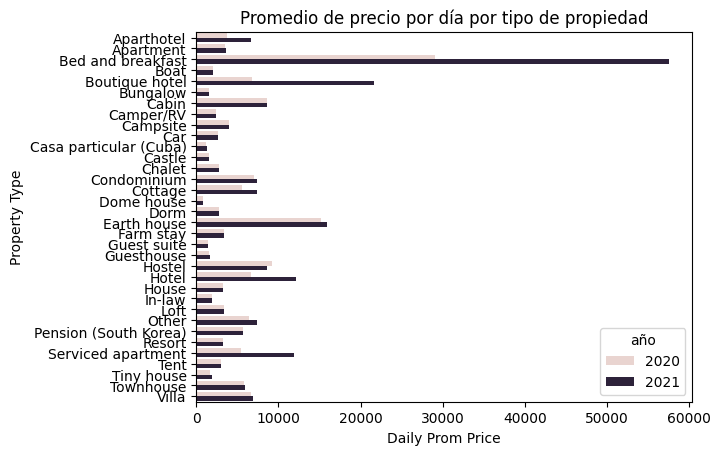

In [39]:
sns.barplot(x="price_prom_x", y="property_type",hue="año", data=a)  # Grafico de barras precio promedio día por tipo de propiedad
plt.title("Promedio de precio por día por tipo de propiedad")
plt.xlabel("Daily Prom Price")
plt.ylabel("Property Type")
plt.show()

De acuerdo con este gráfico se puede observar que para tipos de propiedades como: Bed and Breackfast, boutique hotel, Hotel, Serviced apartment, se evidencia un incremento en el valor promedio del precio día (información disponible en calendario)

In [40]:
#Se procede a hacer un análisis detallado del comportamiento de los precios en la categoría de Bed and Breakfast
#Su promedio de precio diario es muy elevado en comparación con los demás tipos de propiedades
bed = calendario2[calendario2["property_type"]== "Bed and breakfast"]
bed["price_x"].describe(include="all")

count     52925.00
mean      38026.50
std      447050.04
min         550.00
25%         664.00
50%        1062.00
75%        2058.00
max     6637914.00
Name: price_x, dtype: float64

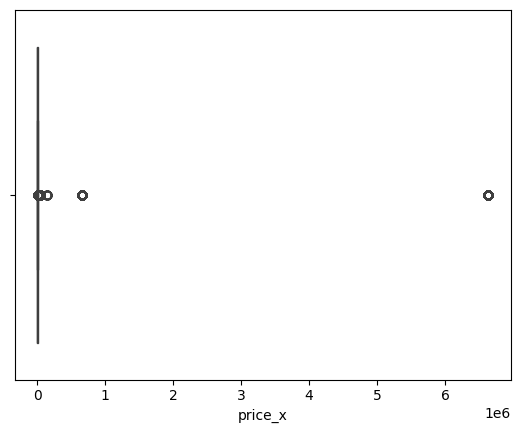

In [41]:
sns.boxplot(x=bed["price_x"])
plt.show()

Se evidencia que hay un punto atipico que está haciendo que este promedio se encuentre muy por encima de las demás propiedades.
Para evitar este comportamiento vamos a eliminar los precios en la tabla calendario que se encuentran atipicos usando la técnica BoxPlot, se aplicará regla en todos los tipos de propiedades.

In [42]:
# Agrupar por tipo de propiedad y calcular los cuartiles
grupo_property = calendario2.groupby("property_type")["price_x"]
q1 = grupo_property.quantile(0.25)
q3 = grupo_property.quantile(0.75)
iqr = q3 - q1

In [43]:
# Función para calcular el límite superior para considerar un valor como outlier
def outlier_clas(x):
    return x["price_x"] > q3.loc[x["property_type"]] + 1.5 * iqr.loc[x["property_type"]]

In [44]:
# Aplicar la función a cada fila del DataFrame
calendario2["outlier"] = calendario2.apply(outlier_clas, axis=1)
calendario2.head()

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,market,country_code,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,año,month,outlier
0,50778,2020-04-26,True,2655.00,2655.00,5.00,1125.00,Buenos Aires,AR,Argentina,Condominium,Entire home/apt,4,1.50,2.00,2.00,2020,4,False
1,133654,2020-04-27,True,1150.00,1150.00,4.00,1125.00,Buenos Aires,AR,Argentina,Apartment,Entire home/apt,2,1.00,1.00,0.00,2020,4,False
2,133654,2020-04-28,True,1150.00,1150.00,4.00,1125.00,Buenos Aires,AR,Argentina,Apartment,Entire home/apt,2,1.00,1.00,0.00,2020,4,False
3,133654,2020-04-29,True,1150.00,1150.00,4.00,1125.00,Buenos Aires,AR,Argentina,Apartment,Entire home/apt,2,1.00,1.00,0.00,2020,4,False
4,133654,2020-04-30,True,1150.00,1150.00,4.00,1125.00,Buenos Aires,AR,Argentina,Apartment,Entire home/apt,2,1.00,1.00,0.00,2020,4,False


In [45]:
calendario2.head()

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,market,country_code,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,año,month,outlier
0,50778,2020-04-26,True,2655.00,2655.00,5.00,1125.00,Buenos Aires,AR,Argentina,Condominium,Entire home/apt,4,1.50,2.00,2.00,2020,4,False
1,133654,2020-04-27,True,1150.00,1150.00,4.00,1125.00,Buenos Aires,AR,Argentina,Apartment,Entire home/apt,2,1.00,1.00,0.00,2020,4,False
2,133654,2020-04-28,True,1150.00,1150.00,4.00,1125.00,Buenos Aires,AR,Argentina,Apartment,Entire home/apt,2,1.00,1.00,0.00,2020,4,False
3,133654,2020-04-29,True,1150.00,1150.00,4.00,1125.00,Buenos Aires,AR,Argentina,Apartment,Entire home/apt,2,1.00,1.00,0.00,2020,4,False
4,133654,2020-04-30,True,1150.00,1150.00,4.00,1125.00,Buenos Aires,AR,Argentina,Apartment,Entire home/apt,2,1.00,1.00,0.00,2020,4,False


Se realiza nuevamente la comparación de los los precios promedios por día por tipo de propiedad por año sin tener en cuenta los valores atipicos

In [46]:
#Vamos a llamar calendario3 al conjunto de datos sin valores atipicos
calendario3= calendario2[calendario2["outlier"]== False]
calendario3.head()

,listing_id,date,available,price_x,adjusted_price,minimum_nights_x,maximum_nights_x,market,country_code,country,property_type,room_type,accommodates,bathrooms,bedrooms,beds,año,month,outlier
0,50778,2020-04-26,True,2655.00,2655.00,5.00,1125.00,Buenos Aires,AR,Argentina,Condominium,Entire home/apt,4,1.50,2.00,2.00,2020,4,False
1,133654,2020-04-27,True,1150.00,1150.00,4.00,1125.00,Buenos Aires,AR,Argentina,Apartment,Entire home/apt,2,1.00,1.00,0.00,2020,4,False
2,133654,2020-04-28,True,1150.00,1150.00,4.00,1125.00,Buenos Aires,AR,Argentina,Apartment,Entire home/apt,2,1.00,1.00,0.00,2020,4,False
3,133654,2020-04-29,True,1150.00,1150.00,4.00,1125.00,Buenos Aires,AR,Argentina,Apartment,Entire home/apt,2,1.00,1.00,0.00,2020,4,False
4,133654,2020-04-30,True,1150.00,1150.00,4.00,1125.00,Buenos Aires,AR,Argentina,Apartment,Entire home/apt,2,1.00,1.00,0.00,2020,4,False


In [47]:
#Volvemos a realizar el grafico comparativo usando el calendario 3 que no tiene atipicos
a2 = calendario3.groupby(["property_type","año"])["price_x"].mean().reset_index() #Promedio por tipo de propiedad y año
a2 = pd.DataFrame(a2)
a2 = a2.rename(columns={"price_x":"price_prom_x"})
a2

,property_type,año,price_prom_x
0,Aparthotel,2020,3388.98
1,Aparthotel,2021,3912.99
2,Apartment,2020,2187.36
3,Apartment,2021,2213.30
4,Bed and breakfast,2020,1276.11
...,...,...,...
63,Tiny house,2021,1590.39
64,Townhouse,2020,2040.79
65,Townhouse,2021,2020.17
66,Villa,2020,2088.73


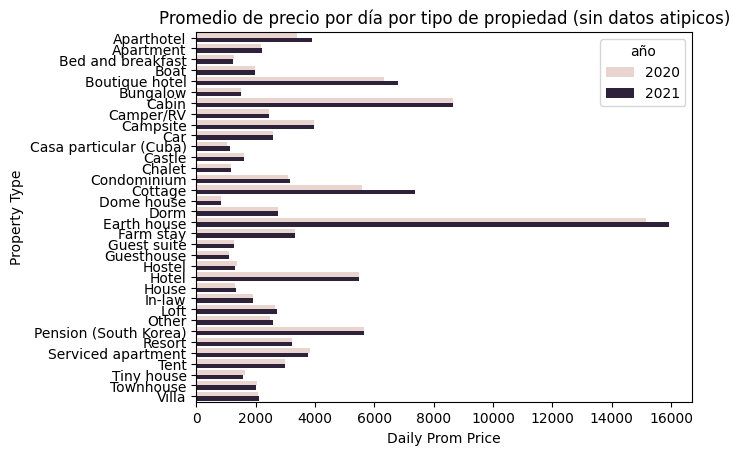

In [48]:
sns.barplot(x="price_prom_x", y="property_type",hue="año", data=a2)  # Grafico de barras precio promedio día por tipo de propiedad
plt.title("Promedio de precio por día por tipo de propiedad (sin datos atipicos)")
plt.xlabel("Daily Prom Price")
plt.ylabel("Property Type")
plt.show()

En esta nueva validación, sin datos atipicos, se puede observar que el tipo de propiedad que presenta mayor precio promedio es Earth House, y que los precios promedios que tuvieron un aumento observable del año 2020 al 2021 fue el tipo de propiedad Cottage y Boutique Hotel

In [49]:
#Se procede a validar este mismo comportamiento pero por tipo de mercado, 
# se incia con el total de los valores(incluyendo atipicos)
b = calendario2.groupby(["market","año"])["price_x"].mean().reset_index() #Promedio por mercado y año
b = pd.DataFrame(b)
b = b.rename(columns={"price_x":"price_prom_x"})
b

,market,año,price_prom_x
0,Beirut,2020,5178.00
1,Beirut,2021,5178.00
2,Buenos Aires,2020,3788.32
3,Buenos Aires,2021,4262.07
4,Mendoza,2020,15240.85
5,Mendoza,2021,17497.63
6,Ocean City,2020,1991.00
7,Ocean City,2021,1991.00
8,Other (International),2020,8276.81
9,Other (International),2021,8246.52


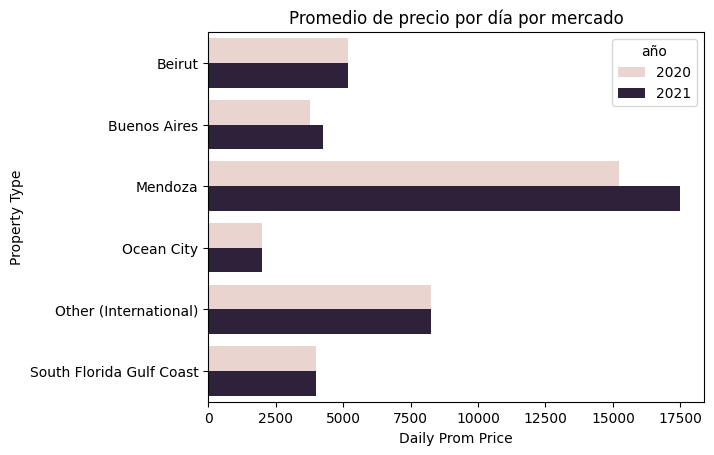

In [50]:
sns.barplot(x="price_prom_x", y="market",hue="año", data=b)  # Grafico de barras precio promedio día por mercado
plt.title("Promedio de precio por día por mercado")
plt.xlabel("Daily Prom Price")
plt.ylabel("Property Type")
plt.show()

<Axes: xlabel='price_x', ylabel='market'>

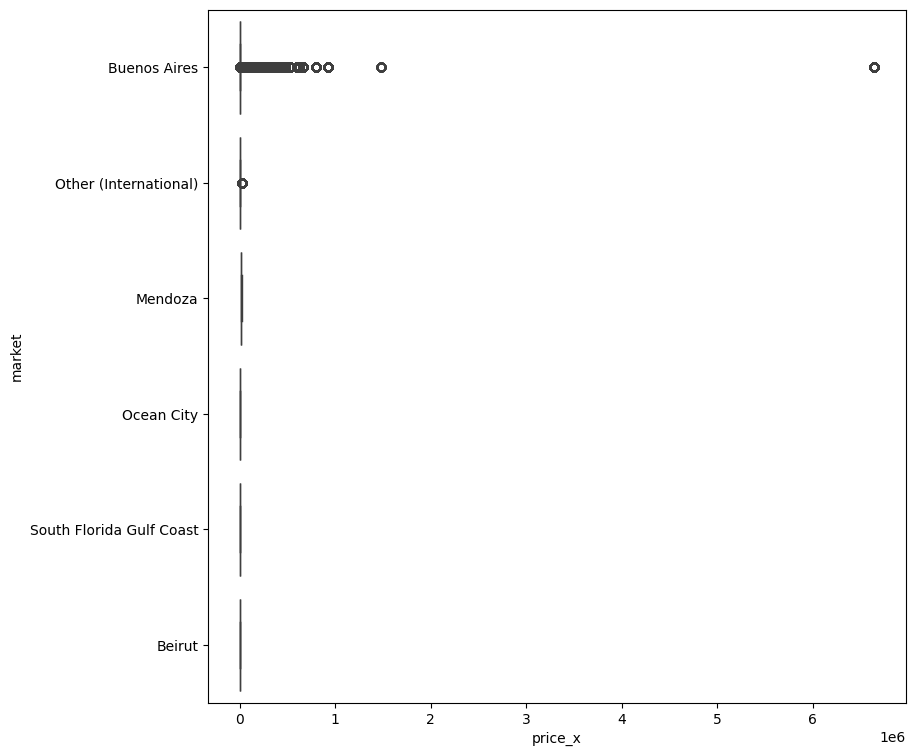

In [51]:
#Vamos a realizar un grafico de boxplot en esta categoria
plt.figure(figsize=(9,9)) # Configura el tamaño de la figura
sns.boxplot(data=calendario2,y="market",x="price_x",dodge=True) # Crea un diagrama de caja utilizando Seaborn


In [52]:
#Se realiza mismo análisis pero sin datos atipicos
b2 = calendario3.groupby(["market","año"])["price_x"].mean().reset_index() #Promedio por mercado y año
b2 = pd.DataFrame(b2)
b2 = b2.rename(columns={"price_x":"price_prom_x"})
b2


,market,año,price_prom_x
0,Beirut,2020,5178.00
1,Beirut,2021,5178.00
2,Buenos Aires,2020,2199.95
3,Buenos Aires,2021,2225.64
4,Ocean City,2020,1991.00
5,Ocean City,2021,1991.00
6,Other (International),2020,2510.02
7,Other (International),2021,2459.53
8,South Florida Gulf Coast,2020,3983.00
9,South Florida Gulf Coast,2021,3983.00


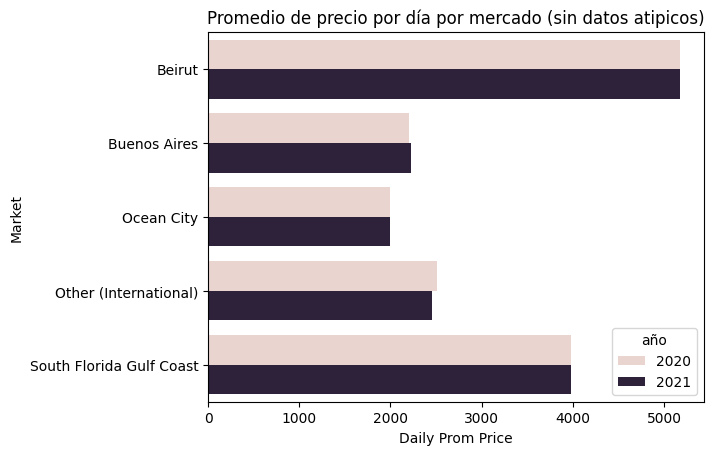

In [53]:
sns.barplot(x="price_prom_x", y="market",hue="año", data=b2)  # Grafico de barras precio promedio día por mercado sin datos atipicos
plt.title("Promedio de precio por día por mercado (sin datos atipicos)")
plt.xlabel("Daily Prom Price")
plt.ylabel("Market")
plt.show()

<Axes: xlabel='price_x', ylabel='market'>

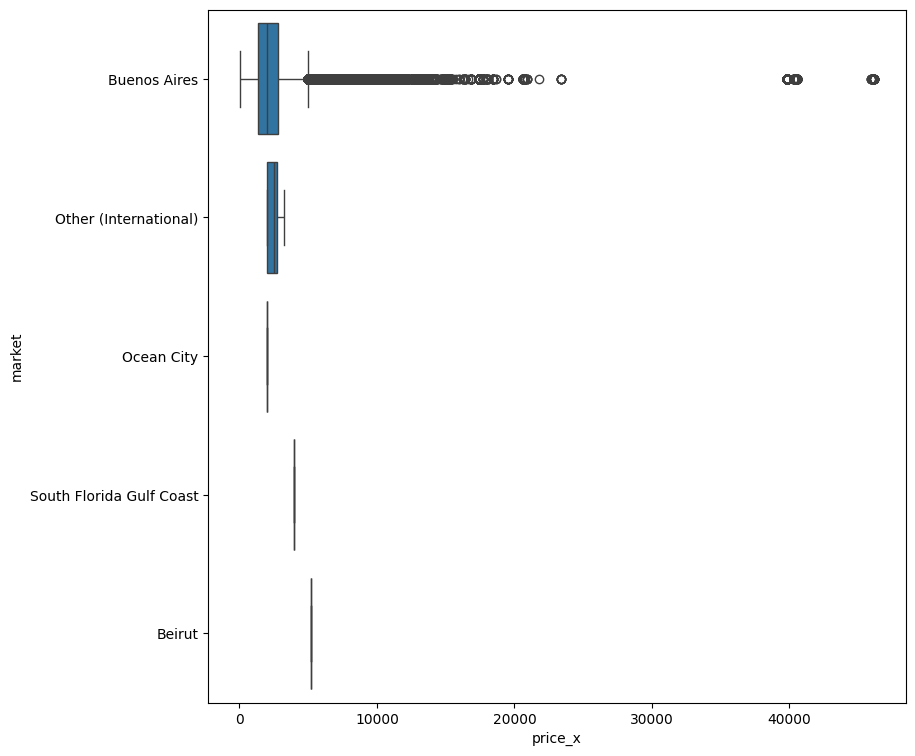

In [54]:
#Se realiza un grafico de boxplot del precio sin datos atipicos
plt.figure(figsize=(9,9)) # Configura el tamaño de la figura
sns.boxplot(data=calendario3,y="market",x="price_x",dodge=True) # Crea un diagrama de caja utilizando Seaborn

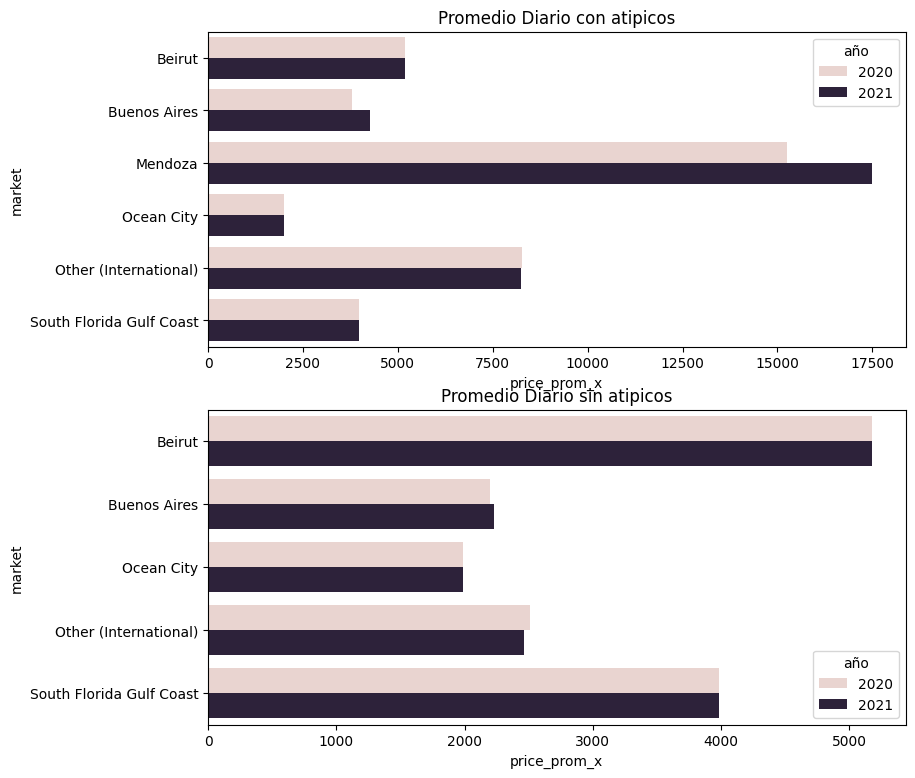

In [60]:
# Vamos a comparar los dos graficos de promedio diario por tipo de mercado con datos atipicos y sin datos atipicos
plt.figure(figsize=(9,9))
plt.subplot(2,1,1)
sns.barplot(x="price_prom_x", y="market",hue="año", data=b)
plt.title("Promedio Diario con atipicos")
plt.subplot(2,1,2)
sns.barplot(x="price_prom_x", y="market",hue="año", data=b2)
plt.title("Promedio Diario sin atipicos")
plt.show()

Al comparar estos dos graficos, se observa que el mercado "Mendoza" desaparece en la segunda grafica que no contiene datos atipicos, al igual que el promedio en el mercado "Other (International)" disminuye en el segundo grafico, lo que podría inidicar que los valores que se han considerado como atipicos, en su mayoría se encuentran en estos mercados.
Por otro lado, en estos dos graficos se observa que no hay diferencias considerables entre el año 2020 y año 2021 por mercados, exceptuando en el Mercado "Mendoza" que para el año 2021 reflejo el mayor aumento en el grafico con valores atipicos

In [61]:
#Se procede a hacer una comparativa en el valor del precio y el precio ajustado en calendario
#  para evidencia diferencias entre estas dos variables
calendario2[["price_x","adjusted_price"]].describe(include="all")

,price_x,adjusted_price
count,8661286.00,8661286.00
mean,3938.84,3934.01
std,39578.40,39577.99
min,19.00,19.00
25%,1350.00,1340.00
50%,2000.00,1999.00
75%,3296.00,3253.00
max,6637914.00,6637914.00


In [62]:
calendario3[["price_x", "adjusted_price"]].describe(include="all")

,price_x,adjusted_price
count,7925004.00,7925004.00
mean,2208.20,2204.37
std,1316.05,1312.38
min,19.00,19.00
25%,1328.00,1328.00
50%,1991.00,1991.00
75%,2788.00,2788.00
max,46134.00,46134.00


In [68]:
c = calendario2.groupby(["market","año"])[["price_x","adjusted_price"]].mean().reset_index() #Promedio por mercado y año
c = pd.DataFrame(c)
c= c.rename(columns={"price_x":"price_prom_x", "adjusted_price":"price_prom_adjusted"})
c2 = calendario3.groupby(["market","año"])[["price_x","adjusted_price"]].mean().reset_index() #Promedio por mercado y año
c2 = pd.DataFrame(c2)
c2= c2.rename(columns={"price_x":"price_prom_x", "adjusted_price":"price_prom_adjusted"})


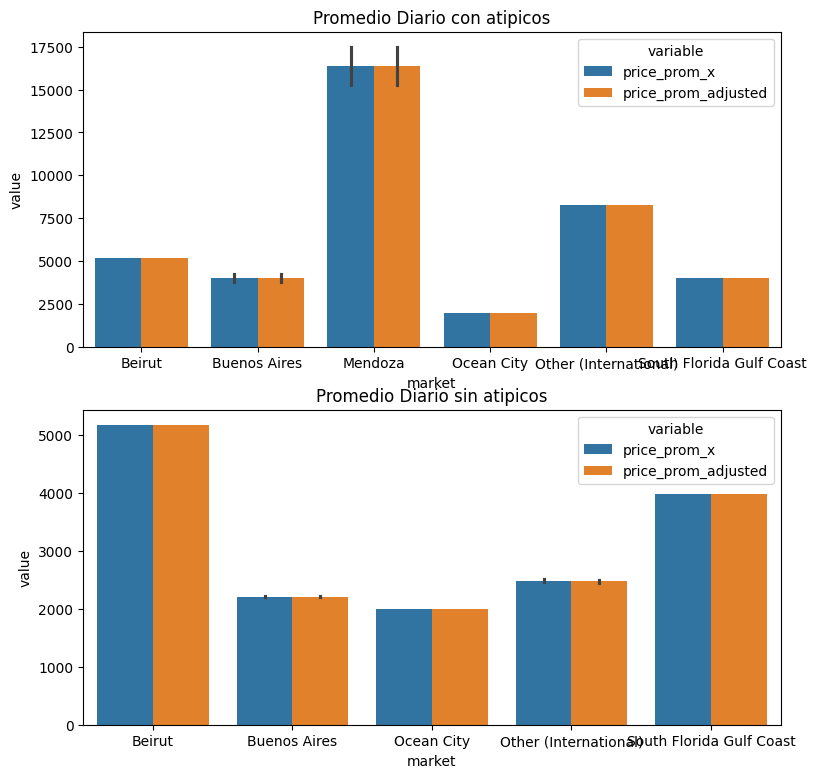

In [71]:
plt.figure(figsize=(9,9))
plt.subplot(2,1,1)
sns.barplot(x='market', y='value', hue='variable', data=pd.melt(c, id_vars='market', value_vars=["price_prom_x", 'price_prom_adjusted']))
plt.title("Promedio Diario con atipicos")
plt.subplot(2,1,2)
sns.barplot(x='market', y='value', hue='variable', data=pd.melt(c2, id_vars='market', value_vars=["price_prom_x", 'price_prom_adjusted']))
plt.title("Promedio Diario sin atipicos")
plt.show()

De acuerdo con la información anterior y el grafico, las diferencias entre estas dos variables (price y adjusted price) son mínimas, así que se podría esperar un comportamiento similiar entre ellas, por lo que no se realizará demás análisis ya realizados a la variable precio ya que tendríamos resultados similares.

Continuaremos con el análisis de varibales del archivo listing

In [72]:
listing_vf.columns

Index(['id', 'name', 'host_id', 'neighbourhood_cleansed', 'market',
       'country_code', 'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'has_availability',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'is_business_travel_ready',
       'cancellation_policy'],
      dtype='object')

In [77]:
listing_vf[["price","bathrooms", "bedrooms", "beds", "minimum_nights", "maximum_nights", "review_scores_rating"]].describe(include="all")

,price,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating
count,23729.00,23667.00,23686.00,23562.00,23729.00,23729.00,16839.00
mean,4014.88,1.26,1.14,1.86,6.03,649.53,94.65
std,16075.33,0.63,0.86,1.49,25.64,879.45,8.89
min,0.00,0.00,0.00,0.00,1.00,1.00,20.00
25%,1394.00,1.00,1.00,1.00,1.00,60.00,93.00
50%,2124.00,1.00,1.00,1.00,3.00,1125.00,97.00
75%,3319.00,1.50,1.00,2.00,4.00,1125.00,100.00
max,663732.00,30.00,30.00,50.00,1125.00,99999.00,100.00


De acuerdo con la información en esta descripción general de variables númericas puede darse la presencia de valores atipicos por precio, bathrooms, bedrooms, beds, minimun_nigths y maximum_nights

In [31]:
#Vamos a marcar los datos atipicos por las siguientes variables: precio - bathrooms - bedrooms
# Teniendo en cuenta los tipos de propiedad para hacer esta marcación
y = "bedrooms"
#y = "price"
#y = "bathrooms"
grupo_precio = listing_vf.groupby("property_type")[y]
q1 = grupo_precio.quantile(0.25)
q3 = grupo_precio.quantile(0.75)
iqr = q3 - q1

In [32]:
# Función para calcular el límite superior para considerar un valor como outlier
def outlier_clas(x):
    return x["bedrooms"] > q3.loc[x["property_type"]] + 1.5 * iqr.loc[x["property_type"]]

In [33]:
#Aplicar la función
listing_vf["outlier-"+y] = listing_vf.apply(outlier_clas, axis=1)
listing_vf.head()

C:\Users\SARAY\AppData\Local\Temp\ipykernel_7780\2929173211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listing_vf["outlier-"+y] = listing_vf.apply(outlier_clas, axis=1)


,id,name,host_id,neighbourhood_cleansed,market,country_code,country,latitude,longitude,is_location_exact,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,is_business_travel_ready,cancellation_policy,outlier-price,outlier-bathrooms,outlier-bedrooms
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Palermo,Buenos Aires,AR,Argentina,-34.58184,-58.42415,True,...,10.0,10.0,10.0,10.0,10.0,True,strict_14_with_grace_period,False,False,False
1,12463,Room in Recoleta - awesome location,48799,Recoleta,Buenos Aires,AR,Argentina,-34.59761,-58.39468,True,...,10.0,10.0,10.0,10.0,10.0,True,moderate,False,False,False
2,13095,Standard Room at Palermo Viejo B&B,50994,Palermo,Buenos Aires,AR,Argentina,-34.59382,-58.42994,True,...,10.0,10.0,10.0,10.0,10.0,True,strict_14_with_grace_period,False,False,False
3,13096,Standard Room in Palermo Viejo B&B,50994,Palermo,Buenos Aires,AR,Argentina,-34.59398,-58.42853,True,...,NaN,NaN,NaN,NaN,NaN,True,strict_14_with_grace_period,False,False,False
4,13097,Standard Room at Palermo Viejo B&B,50994,Palermo,Buenos Aires,AR,Argentina,-34.59348,-58.42949,True,...,10.0,10.0,10.0,10.0,10.0,True,strict_14_with_grace_period,False,False,False


In [34]:
listing_vf[["price", "property_type", "bathrooms","bedrooms", "outlier-price", "outlier-bathrooms", "outlier-bedrooms" ]].head()

,price,property_type,bathrooms,bedrooms,outlier-price,outlier-bathrooms,outlier-bedrooms
0,3983.0,Condominium,1.0,1.0,False,False,False
1,1593.0,Apartment,1.0,1.0,False,False,False
2,2987.0,Bed and breakfast,1.0,1.0,False,False,False
3,2987.0,Bed and breakfast,1.0,1.0,False,False,False
4,2987.0,Bed and breakfast,1.0,1.0,False,False,False


Vamos a hacer un nuevo conjunto de datos sin datos atipicos le llamaremos listing_vf2

In [36]:
mascara1 = (listing_vf["outlier-price"]== False) & (listing_vf["outlier-bathrooms"]== False) &(listing_vf ["outlier-bedrooms"]== False)
listing_vf2 = listing_vf[mascara1]
listing_vf2
listing_vf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15997 entries, 0 to 23728
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           15997 non-null  int64  
 1   name                         15991 non-null  object 
 2   host_id                      15997 non-null  int64  
 3   neighbourhood_cleansed       15997 non-null  object 
 4   market                       15983 non-null  object 
 5   country_code                 15997 non-null  object 
 6   country                      15997 non-null  object 
 7   latitude                     15997 non-null  float64
 8   longitude                    15997 non-null  float64
 9   is_location_exact            15997 non-null  bool   
 10  property_type                15997 non-null  object 
 11  room_type                    15997 non-null  object 
 12  accommodates                 15997 non-null  int64  
 13  bathrooms            

In [38]:
listing_vf2[["price","bathrooms", "bedrooms", "beds", "minimum_nights", "maximum_nights", "review_scores_rating"]].describe(include="all")

,price,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,review_scores_rating
count,15997.000000,15957.000000,15962.000000,15883.000000,15997.000000,15997.000000,11621.000000
mean,2189.065200,1.049602,0.805225,1.501543,5.467713,632.331687,94.651407
std,1884.557011,0.283397,0.403096,0.973866,22.438943,952.698001,8.830693
min,133.000000,0.000000,0.000000,0.000000,1.000000,1.000000,20.000000
25%,1328.000000,1.000000,1.000000,1.000000,1.000000,40.000000,93.000000
50%,1925.000000,1.000000,1.000000,1.000000,2.000000,1124.000000,97.000000
75%,2655.000000,1.000000,1.000000,2.000000,4.000000,1125.000000,100.000000
max,53104.000000,6.500000,5.000000,16.000000,1125.000000,99999.000000,100.000000


<Axes: >

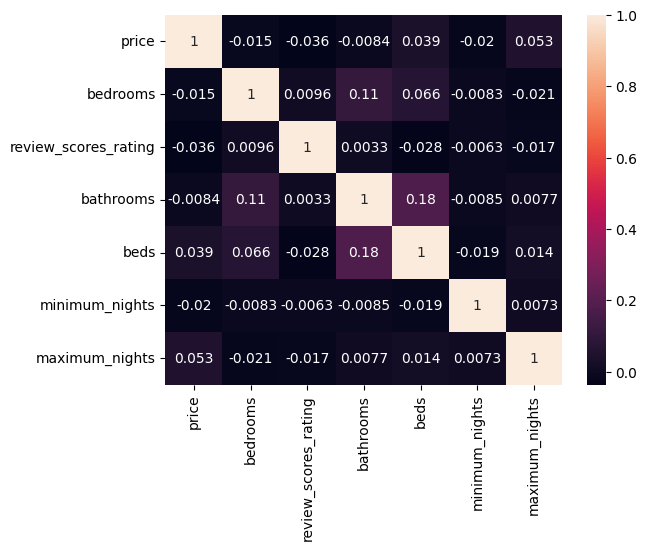

In [43]:
#Vamos a revisar la matriz de correlación usando el heatmap con las variables númericas 
# usando el conjunto de datos sin atipicos
sns.heatmap(listing_vf2[['price','bedrooms','review_scores_rating', "bathrooms", "beds", "minimum_nights", "maximum_nights"]].corr(), annot=True)
plt.show()

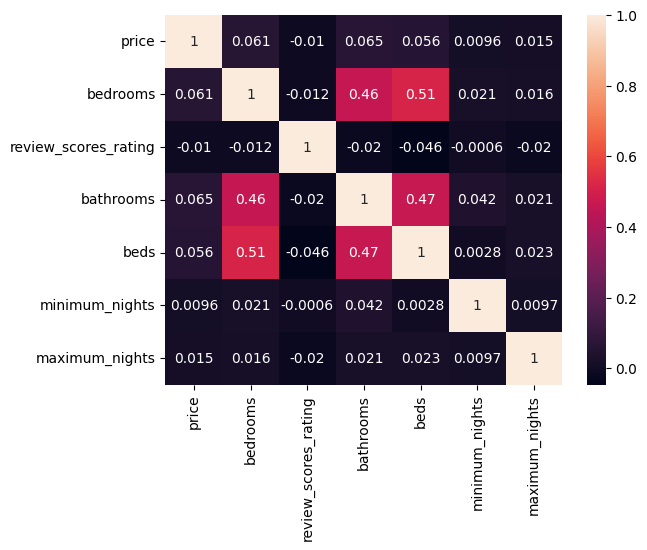

In [44]:
#Vamos a revisar la matriz de correlación usando el heatmap con las variables númericas 
# usando el conjunto de datos con atipicos
sns.heatmap(listing_vf[['price','bedrooms','review_scores_rating', "bathrooms", "beds", "minimum_nights", "maximum_nights"]].corr(), annot=True)
plt.show()

Sin tener en cuenta los valores atipicos, las variables númericas analizadas (precio , habitaciones, camas, baños, rating, noches maximas, noche minimas) tienen una correlación bastante baja.

En este punto se procederá a llevar los conjunto de datos a una herramienta de visualización que permita una mejor comprensión visual de la información y determinar conclusiones.
De acuerdo con la información suministrada en cada conjunto de datos, llevaremos a la herramienta de visualización la siguiente información:
1. Del conjunto de datos por calendario, sacaremos el promedio mensual del precio por cada listing y se marcaran los datos atipicos
2. Del conjunto de  datos de listing, se tomaran las columnas seleccionadas y ajustadas con los datos atipicos marcados.